# Churn Rate Analysis

**DATASET INFO: Bank churn details**

In [106]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

read the file

look at some records


In [107]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [212]:
df['Tenure'].min()

0

In [108]:
df.shape

(10000, 18)

In [109]:
df.rename(columns={"Exited":"target"},inplace=True)

In [110]:
df[['CreditScore','EstimatedSalary','Balance','Tenure']].describe()

,CreditScore,EstimatedSalary,Balance,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,100090.239881,76485.889288,5.012800
std,96.653299,57510.492818,62397.405202,2.892174
min,350.000000,11.580000,0.000000,0.000000
25%,584.000000,51002.110000,0.000000,3.000000
50%,652.000000,100193.915000,97198.540000,5.000000
75%,718.000000,149388.247500,127644.240000,7.000000
max,850.000000,199992.480000,250898.090000,10.000000


```
Average Tenure of the customer is 5 years

```

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  target              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### targets ratio

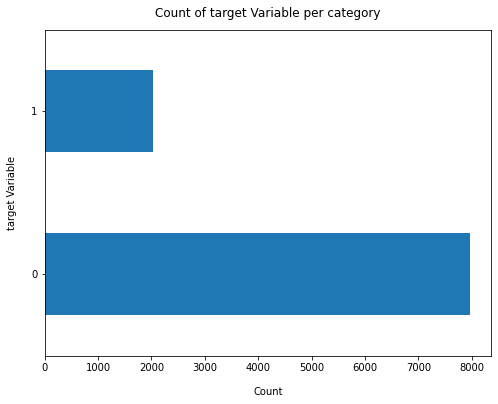

In [112]:

targetColumn = df['target']
targetColumn.value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("target Variable", labelpad=14)
plt.title("Count of target Variable per category", y=1.02);


In [113]:
df.target.value_counts()

0    7962
1    2038
Name: target, dtype: int64

#### Check if Data is Balanced or Imbalanced

In [114]:
100*targetColumn.value_counts()/len(targetColumn)

0    79.62
1    20.38
Name: target, dtype: float64

* Data is <i>HIGHLY IMBALANCED</b> where the ratio is = 80:20<br>
* Later we will solve this

# Data Pre-Processing

check null values present or not


In [115]:
df.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
target                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.(mean,time series forecasting,rolling window method, previous value)
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.(ONLY IF YOU HAVE DOMAIN KNOWLEDGE)
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

**1. Create a copy of base data for manupulation & processing**


In [163]:
df_copy = df.copy()


### Create Bins

In [164]:
# Get the max Age
print(df_copy['Age'].min()) 
print(df_copy['Age'].max()) 


18
92


In [165]:
# Group the Age in bins
labels = ['18-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

df_copy['Age_group'] = pd.cut(df_copy.Age, bins=[17,30,40,50,60,70,80,90,100], labels=labels)

In [166]:
df_copy['Age_group'].value_counts()


31-40     4451
41-50     2320
18-30     1968
51-60      797
61-70      331
71-80      121
81-90       10
91-100       2
Name: Age_group, dtype: int64

In [167]:
df_copy['Age_group'].isna().sum()

0

In [168]:
# bins of credit score
print(df_copy['CreditScore'].min()) 
print(df_copy['CreditScore'].max()) 

350
850


In [169]:
labels = ['350-450','451-550','551-650','651-850']

df_copy['CreditScore_group'] = pd.cut(df_copy.CreditScore, bins=[349,450,550,650,851], labels=labels)

In [170]:
# bins of Estimated Salary
print(df_copy['EstimatedSalary'].min()) 
print(df_copy['EstimatedSalary'].max()) 

11.58
199992.48


In [171]:
labels = ['0-50000','51000-100000','100001-150000','150001-200000']

df_copy['EstimatedSalary_group'] = pd.cut(df_copy.EstimatedSalary, bins=[0,50000,100000,150000,200000], labels=labels)

**6 Remove columns not required for processing.**


In [172]:
#drop column Surname,CustomerId,RowNumber,Age
df_copy.drop(columns= ['Surname','CustomerId','RowNumber','Age'], axis=1, inplace=True)
df_copy.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target,Complain,Satisfaction Score,Card Type,Point Earned,Age_group,CreditScore_group,EstimatedSalary_group
0,619,France,Female,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,551-650,100001-150000
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,551-650,100001-150000
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50,451-550,100001-150000
3,699,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31-40,651-850,51000-100000
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41-50,651-850,51000-100000


# Data Exploration

### Univariate Analysis


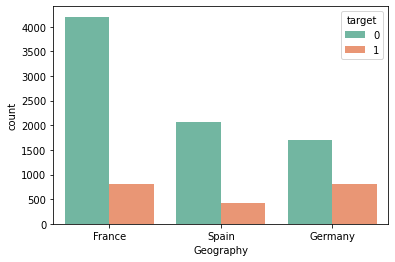

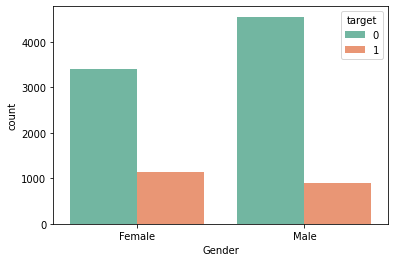

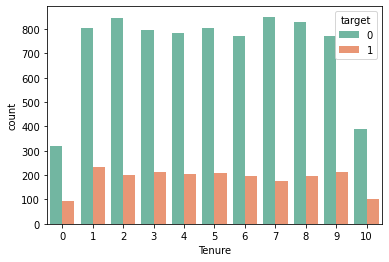

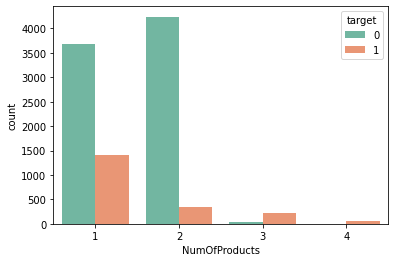

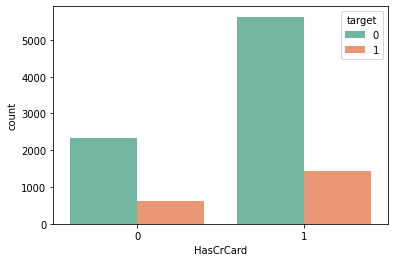

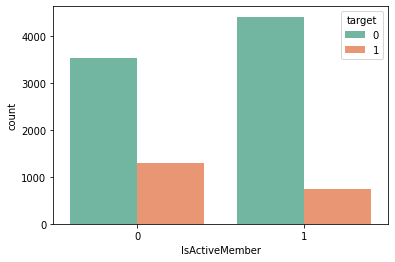

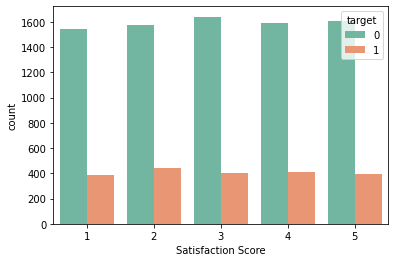

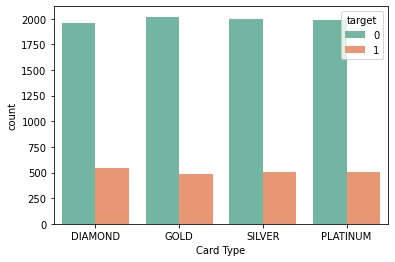

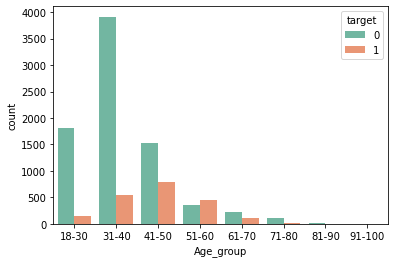

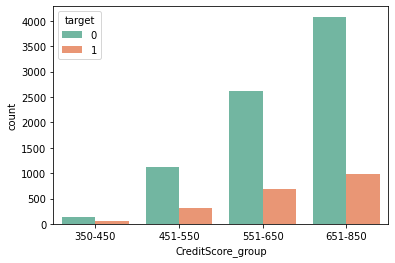

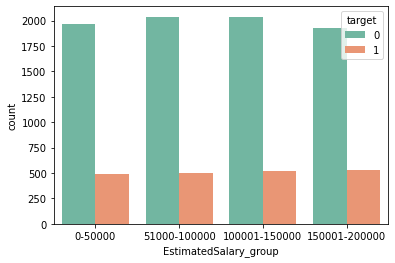

In [174]:
for i, predictor in enumerate(df_copy.drop(columns=['target','Complain','Balance','Point Earned','CreditScore','EstimatedSalary'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='target',palette = 'Set2')

## INSIGHTS

Most of the customers are from France, But <code>Germany</code> has High Number of <code>Churn Rate</code> and which is Something we should look at.

<code>Females</code> have churned more than <code>Males</code>.

People who are <code>active member</code> of bank have churned less than those who are'nt

We can see that in age group <code>51-60</code> number of <code>churners > non-churners</code> and ```highest``` number of churners are in ```41-50``` age group

Customers with <code>credit card</code> have ```churned``` more than people who do not have it

Features <code>'EstimatedSalary_group','Card Type','Satisfaction Score'</code> are almost uniformly distributed

**3. Convert all the categorical variables into dummy variables**

There are various methods by which you can do this:

**1. Label Encoding:** Only use this for target variables because if used for normal features the machine can misinterpret and may give high priority to high number<br>

**2. One Hot Encoding:** This is more useful method to convert categorical to numerical by creating new features from number of types in that column and give 1 and 0 to them.
    for example: if you have country as feature and there are 4 countries , create 4 new columns and specify 0 and 1 for that particular record. If one country is 1 all others will be zero<br>
    
<i>Dummy Trap: </b>use n-1 variables from that feature. Example use 3 countries instead 4 because you can know the 4th one from other 3 countries

In [175]:
df_dummies = pd.get_dummies(df_copy)
df_dummies.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target,Complain,Satisfaction Score,...,Age_group_81-90,Age_group_91-100,CreditScore_group_350-450,CreditScore_group_451-550,CreditScore_group_551-650,CreditScore_group_651-850,EstimatedSalary_group_0-50000,EstimatedSalary_group_51000-100000,EstimatedSalary_group_100001-150000,EstimatedSalary_group_150001-200000
0,619,2,0.00,1,1,1,101348.88,1,1,2,...,0,0,0,0,1,0,0,0,1,0
1,608,1,83807.86,1,0,1,112542.58,0,1,3,...,0,0,0,0,1,0,0,0,1,0
2,502,8,159660.80,3,1,0,113931.57,1,1,3,...,0,0,0,1,0,0,0,0,1,0
3,699,1,0.00,2,0,0,93826.63,0,0,5,...,0,0,0,0,0,1,0,1,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,5,...,0,0,0,0,0,1,0,1,0,0


**10.  target variable wrt Numerical columns**

 - Relation between <code>Balance</code> and <code>target</code>

Text(0.5, 1.0, 'Balance wrt target')

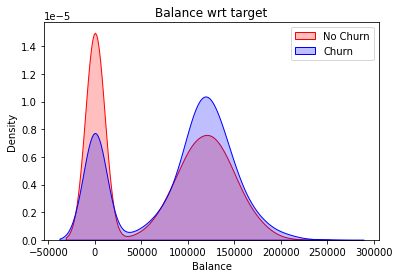

In [183]:
col1 = 'Balance'
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel(col1)
Mth.set_title(f'{col1} wrt target')

- INSIGHT: 
  - Many customers of have ```zero balance``` and that customers have ```low Churn Rate```
  - Those who have balance are ```normally distributed``` and the ```median ones``` have ```slightly high churn rate```

 - Relation between <code>CrediScore</code> and <code>target</code>

Text(0.5, 1.0, 'CreditScore wrt target')

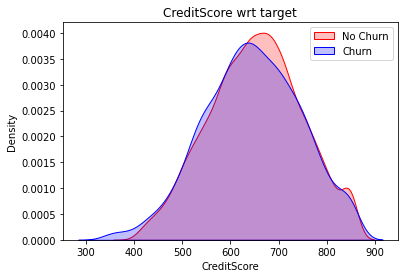

In [180]:
col1 = 'CreditScore'
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel(col1)
Mth.set_title(f'{col1} wrt target')

- INSIGHT: 
  - Here the target is ```normally distributed``` and the credit score range ```600-700``` seems to have ```highest``` churn and not churn rate
  - Person with ```high score``` is more likely to ```churn``` than person with ```lower score```

 - Relation between <code>EstmatedSalary</code> and <code>target</code>

Text(0.5, 1.0, 'EstimatedSalary wrt target')

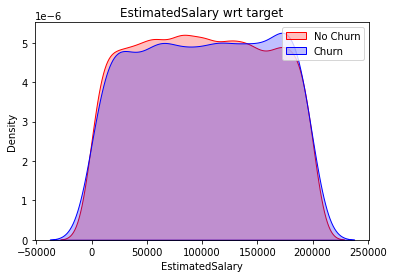

In [181]:
col1 = 'EstimatedSalary'
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel(col1)
Mth.set_title(f'{col1} wrt target')

 - Relation between <code>Point Earned</code> and <code>target</code>

Text(0.5, 1.0, 'Point Earned wrt target')

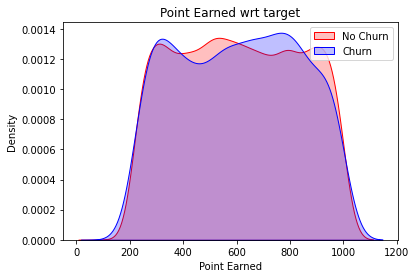

In [182]:
col1 = 'Point Earned'
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies[col1][(df_dummies["target"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel(col1)
Mth.set_title(f'{col1} wrt target')

**11. Build a corelation of all predictors with 'target'**

<AxesSubplot:>

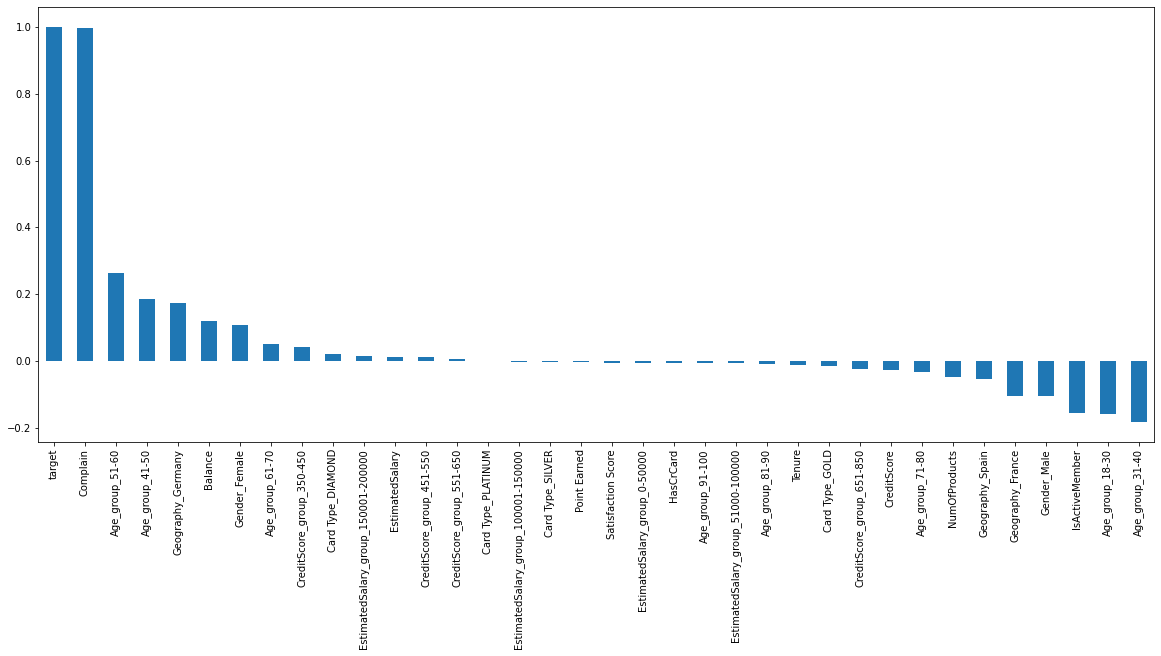

In [184]:
plt.figure(figsize=(20,8))
df_dummies.corr()['target'].sort_values(ascending = False).plot(kind='bar')

- INSIGHT
  - ```Complain``` feature is <i>100% correlated</i> with the target -> so we will <i>drop</i> that column for our model to work better
  - ```HIGH``` churn seen in <i>Age_group_51-60,Geography_Germany,Balance,Gender_Female</i>
  - ```LOW``` churn seen in <i>Geography_France,Geography_Spain,Gender_Male,IsActiveMember</i>
  - <i>Card_Type_Platinum/Silver,Point Earned,salary between 100001 to 150000</i> seems to have no impact on churn rate

<b>Heatmap of correlation between all features</b>

<AxesSubplot:>

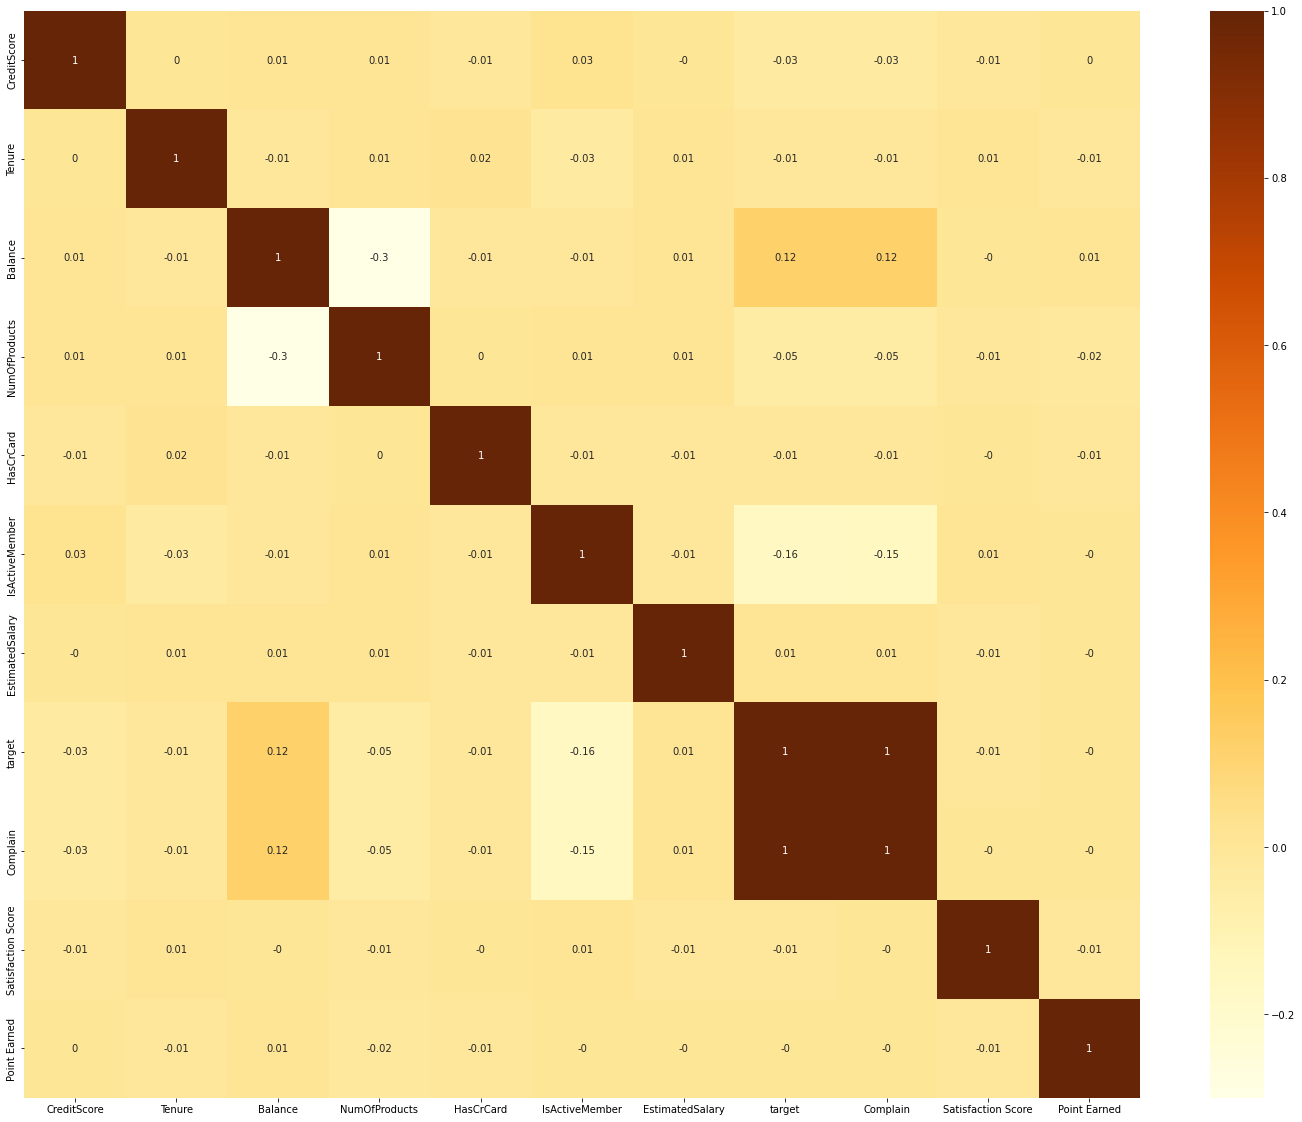

In [186]:
corr = df_copy.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

### Bivariate Analysis

making separate target df

In [187]:
new_df1_target0=df_copy.loc[df_copy["target"]==0]
new_df1_target1=df_copy.loc[df_copy["target"]==1]

Graph for bivariate analysis

In [191]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 16
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 24
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [194]:
new_df1_target1.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target,Complain,Satisfaction Score,Card Type,Point Earned,Age_group,CreditScore_group,EstimatedSalary_group
0,619,France,Female,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,551-650,100001-150000
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50,451-550,100001-150000
5,645,Spain,Male,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,41-50,551-650,100001-150000
7,376,Germany,Female,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,18-30,350-450,100001-150000
16,653,Germany,Male,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163,51-60,651-850,0-50000


for yes use:

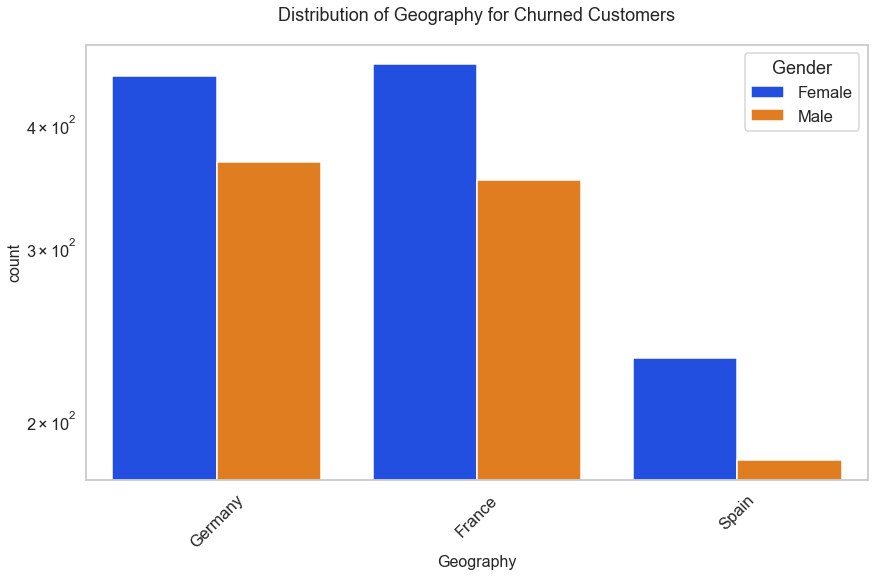

In [198]:
uniplot(new_df1_target1,col='Geography',title='Distribution of Geography for Churned Customers',hue='Gender')


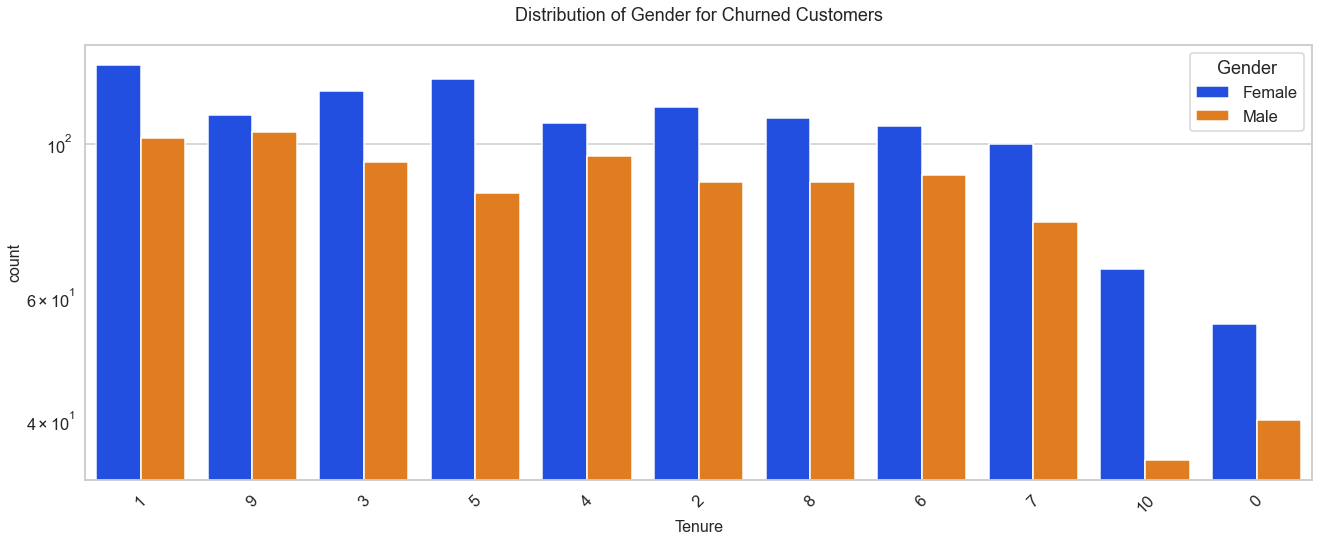

In [199]:
uniplot(new_df1_target1,col='Tenure',title='Distribution of Tenure for Churned Customers',hue='Gender')


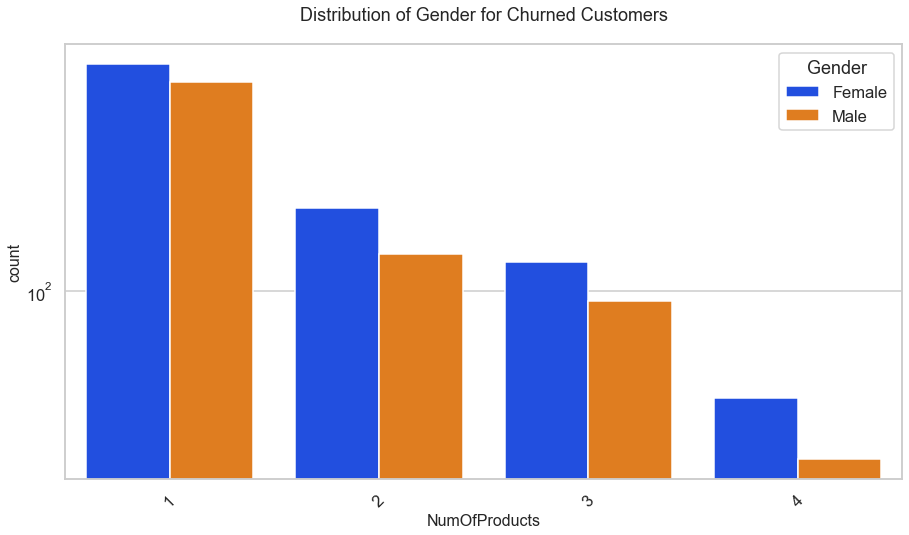

In [200]:
uniplot(new_df1_target1,col='NumOfProducts',title='NumOfProducts of Gender for Churned Customers',hue='Gender')


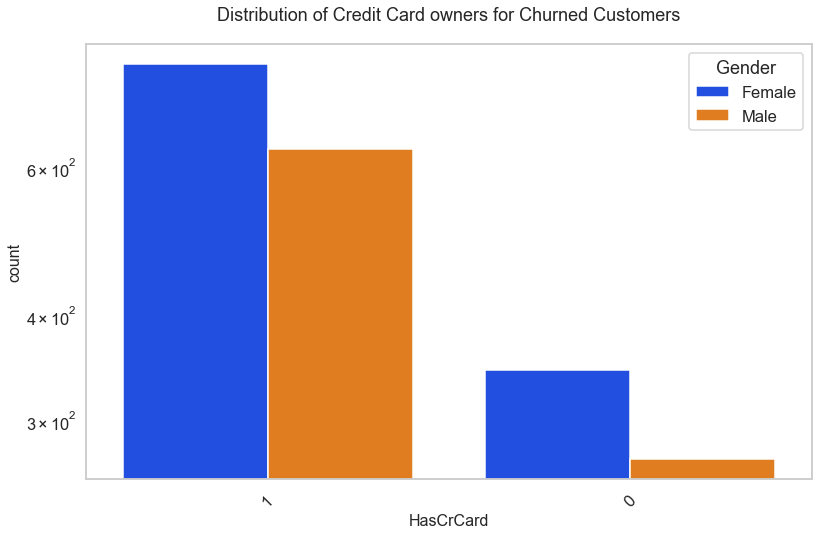

In [201]:
uniplot(new_df1_target1,col='HasCrCard',title='Distribution of Credit Card owners for Churned Customers',hue='Gender')


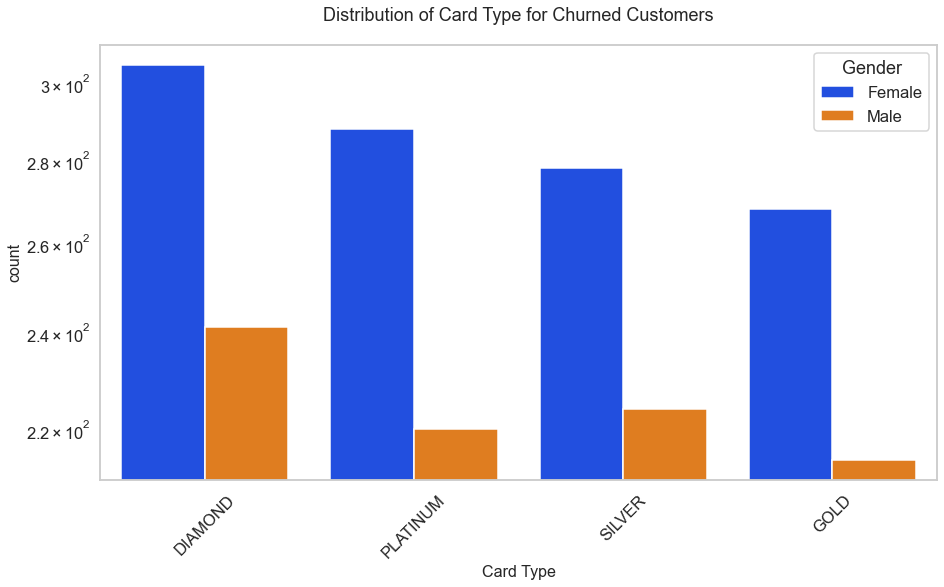

In [202]:
uniplot(new_df1_target1,col='Card Type',title='Distribution of Card Type for Churned Customers',hue='Gender')


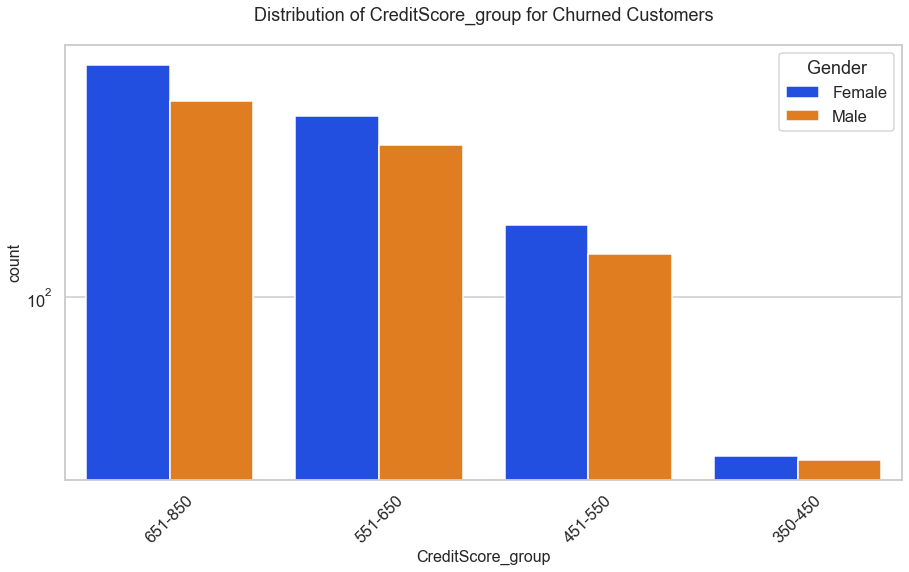

In [203]:
uniplot(new_df1_target1,col='CreditScore_group',title='Distribution of CreditScore_group for Churned Customers',hue='Gender')


# CONCLUSION

These are some of the quick insights from this exercise:

1. In Every Country Female customers are more likely to churn than male customers
2. 1 year Tenure customers are more likely to churn because of low contract time, as they are free to go customers.
3. Customer with 1 Number of product are high churners
4. Credit Card owners are high churners and Female Credit card owners are more than male ones 
5. People with Diamond Card type are highest churners

### Save dummies df to csv for model building

In [204]:
filename = 'bank_churn.csv'
df_dummies.to_csv(filename,index=False)


# after building model check by converting numb of prod and satisfact score into catprgy


<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Important Observations :</h3>
    <div class="alert alert-block alert-info">
* <i> There are total of <code>12</code> columns and <code>10000</code> rows in data.</i><br>
    </div>
    </div>